<a href="https://colab.research.google.com/github/dalexa10/Numerical_Methods_PDEs/blob/main/Lecture_8/06-burgers-LF-template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [11]:
T = 1.0 # end time

nx = 100 # number of cells
hx = (1/nx)/2

x, hx = np.linspace(hx, 1, nx, endpoint=False, retstep=True)  # TODO: check this line
#plt.plot(x, 0*x, 'go')
#plt.plot(x-(1/nx/2), 0*x, 'b|')
#plt.plot(x+(1/nx/2)+5e-3, 0*x, 'b|')
xx = np.linspace(0, 1, 1000, endpoint=False)

gamma = 0.95
ht = hx * gamma
nt = int(T/ht)

print(f'     T = {T}')
print(f'tsteps = {nt}')
print(f'    hx = {hx}')
print(f'    ht = {ht}')
print(f' gamma = {gamma}')

def square(x):
    u = np.zeros(x.shape)
    u[np.where((x>0.05) & (x<0.4))[0]] = 1.0
    return u

uinit = square

     T = 1.0
tsteps = 105
    hx = 0.00995
    ht = 0.0094525
 gamma = 0.95


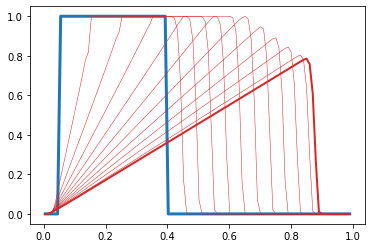

In [12]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

u = uinit(x)
plt.plot(x, u, lw=3, color='tab:blue')

def f(u):
    return u**2/2

def fprime(u):
    return u

for tstep in range(1, nt+1):
        
    uplus = u[Jp1]
    uminus = u[J]
    
    alpha = np.maximum(np.abs(fprime(uplus)), np.abs(fprime(uminus)))
    
    flux = (f(uplus) + f(uminus))/2 - (alpha / 2) * (uplus - uminus)

    u[:] = u - ((ht / hx) * (flux[J] - flux[Jm1]))
    
    if tstep % 10 == 0:
        plt.plot(x, u, lw=0.5, color='tab:red')
    
plt.plot(x, u, color='tab:red', lw=2)